<a href="https://colab.research.google.com/github/Jackyscy/cv/blob/main/Temperature_Spread_Regularizarion_on_state_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("2023_one hours__normal_on_state.csv", parse_dates=["Date_Time"],
        index_col=["Date_Time"],)

data.head()

,Gt Exhaust Outlet Temp,Turbine Speed In RPM,GT Fuel Gas Mass Flow,GT Gross MW,GT Compres Inlet Temp,GT IGV Position,GT Turbine Inlet Temperature,GT Swirl Angle,GT Efficiency Actual (LHV),GT (Expander) Efficiency,...,Turb Exhaust T/C 22,Turb Exhaust T/C 23,Turb Exhaust T/C 24,Turb Exhaust T/C 25,Turb Exhaust T/C 26,Turb Exhaust T/C 27,Turb Exhaust T/C 28,Turb Exhaust T/C 29,Turb Exhaust T/C 30,Turb Exhaust T/C 31
Date_Time,,,,,,,,,,,,,,,,,,,,,
2023-01-20 17:00:00,611.855,2999.121,13.760,231.782,18.940,87.999,1255.732,14.534,34.919,85.409,...,615.768,608.536,605.209,601.492,610.876,615.695,628.713,611.376,604.494,619.819
2023-01-20 18:00:00,604.004,3002.146,13.175,226.570,18.938,84.113,1244.014,19.430,35.239,85.504,...,607.697,606.971,595.928,589.052,595.202,609.593,616.492,608.235,600.413,600.202
2023-01-20 19:00:00,637.918,3001.744,11.979,207.629,18.780,65.027,1284.943,38.101,35.913,87.532,...,645.148,637.373,643.240,637.800,623.243,636.460,648.020,645.099,648.190,637.079
2023-01-20 20:00:00,636.447,3002.868,12.306,212.659,18.626,67.205,1283.541,33.234,35.783,87.373,...,644.380,632.764,648.446,627.277,618.795,641.789,640.982,649.530,641.044,630.275
2023-01-20 21:00:00,637.513,2998.669,11.290,193.451,17.743,60.577,1270.635,51.623,35.513,86.980,...,641.349,636.851,641.639,638.126,639.001,628.511,633.543,643.794,639.210,642.735


In [3]:
data.tail()

,Gt Exhaust Outlet Temp,Turbine Speed In RPM,GT Fuel Gas Mass Flow,GT Gross MW,GT Compres Inlet Temp,GT IGV Position,GT Turbine Inlet Temperature,GT Swirl Angle,GT Efficiency Actual (LHV),GT (Expander) Efficiency,...,Turb Exhaust T/C 22,Turb Exhaust T/C 23,Turb Exhaust T/C 24,Turb Exhaust T/C 25,Turb Exhaust T/C 26,Turb Exhaust T/C 27,Turb Exhaust T/C 28,Turb Exhaust T/C 29,Turb Exhaust T/C 30,Turb Exhaust T/C 31
Date_Time,,,,,,,,,,,,,,,,,,,,,
2023-10-29 18:00:00,631.871,2999.082,12.371,209.080,26.803,76.402,1270.740,36.868,35.081,85.716,...,632.941,635.023,632.089,614.970,619.824,645.096,635.414,637.595,632.764,625.949
2023-10-29 19:00:00,626.932,3002.417,13.265,216.246,26.510,87.982,1255.402,30.070,33.778,84.150,...,628.389,626.967,614.922,612.110,632.990,627.393,636.445,629.851,626.253,630.960
2023-10-29 20:00:00,627.254,2998.286,13.206,214.829,26.462,87.990,1253.733,31.251,33.656,83.951,...,630.019,627.262,612.782,610.185,632.697,628.726,638.796,629.555,622.468,630.057
2023-10-29 21:00:00,627.054,2997.869,13.288,216.627,26.232,87.984,1255.249,29.385,33.780,84.081,...,628.844,626.230,613.153,609.790,633.529,628.954,640.118,630.300,622.481,631.250
2023-10-29 22:00:00,623.723,3001.700,13.273,216.795,25.943,88.004,1252.697,28.859,33.896,84.335,...,625.089,624.296,609.799,606.911,631.486,626.173,635.994,627.009,619.739,626.640


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2743 entries, 2023-01-20 17:00:00 to 2023-10-29 22:00:00
Data columns (total 47 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Gt Exhaust Outlet Temp           2743 non-null   float64
 1   Turbine Speed In RPM             2743 non-null   float64
 2   GT Fuel Gas Mass Flow            2743 non-null   float64
 3   GT Gross MW                      2743 non-null   float64
 4   GT Compres Inlet Temp            2743 non-null   float64
 5   GT IGV Position                  2743 non-null   float64
 6   GT Turbine Inlet Temperature     2743 non-null   float64
 7   GT Swirl Angle                   2743 non-null   float64
 8   GT Efficiency Actual (LHV)       2743 non-null   float64
 9   GT (Expander) Efficiency         2743 non-null   float64
 10  Combust Monitor Actual Spread 2  2743 non-null   float64
 11  GT Compres Inlet Press           2743 non-null

<Axes: >

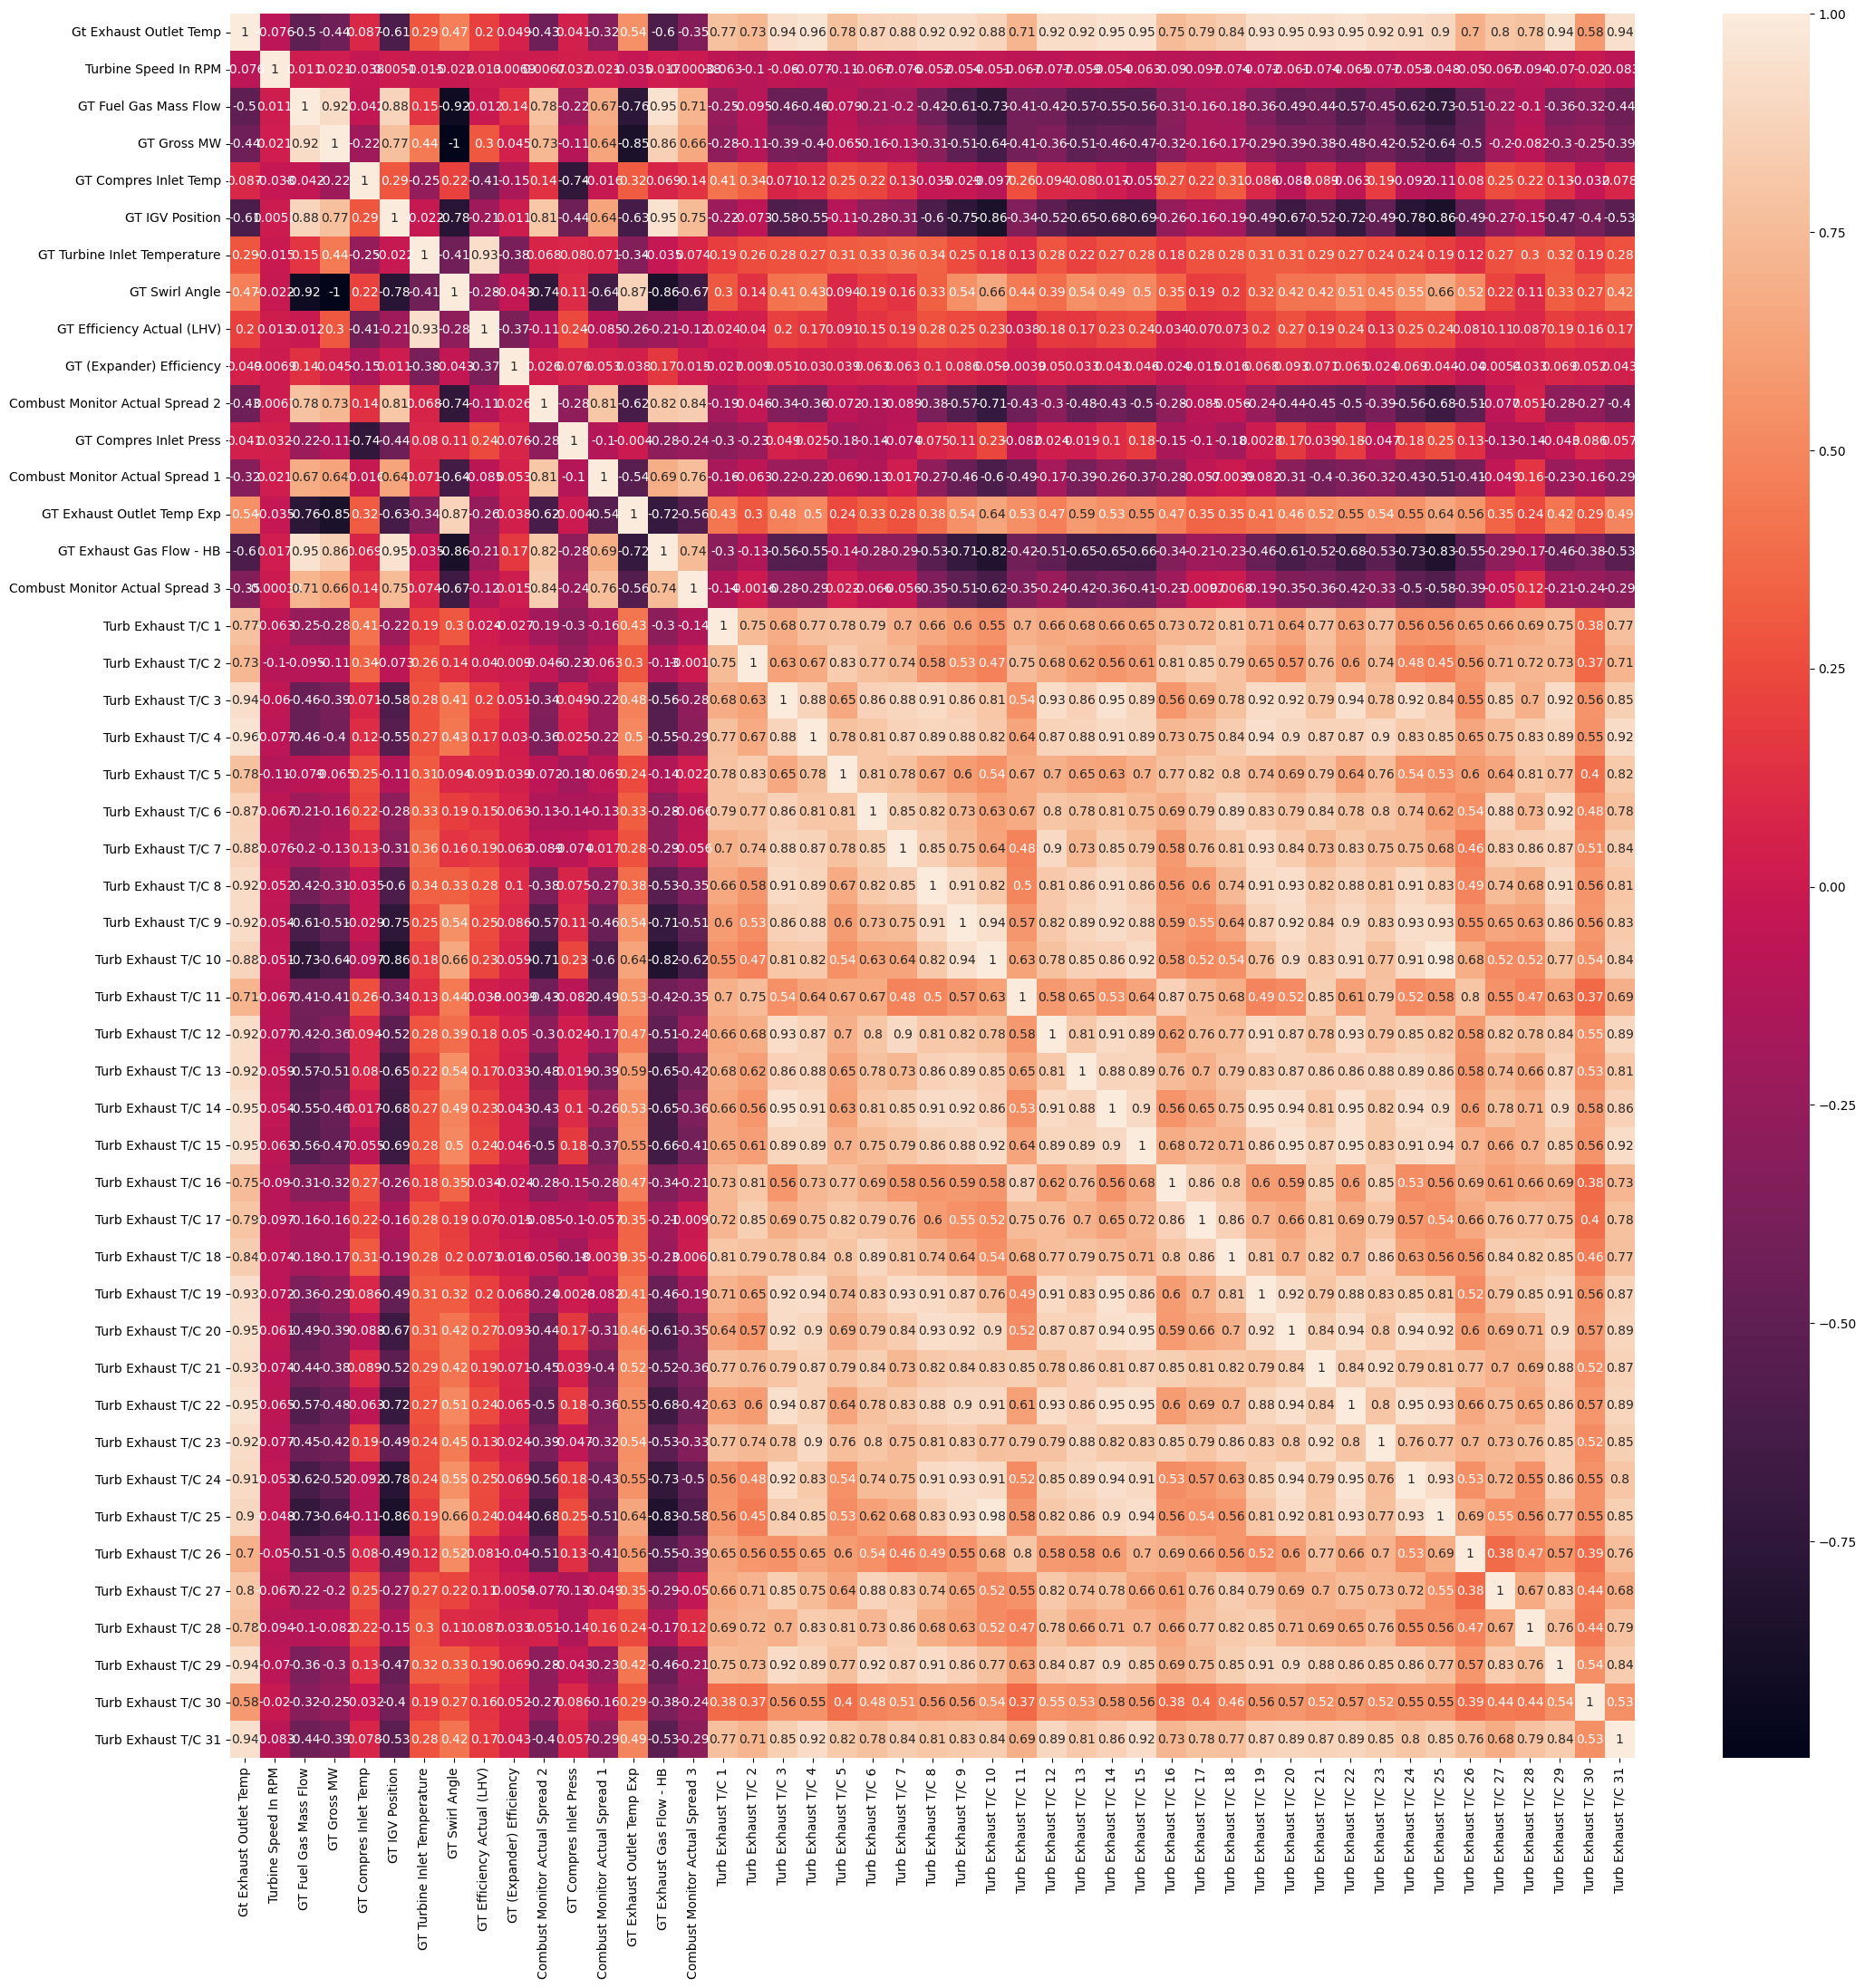

In [5]:
fig, ax = plt.subplots(figsize=(25,25))

corr = data.corr()
sns.heatmap(corr , annot = True , ax=ax)

In [ ]:
#print("Slewness in Column: Combust Monitor Actual Spread 1", data["Combust Monitor Actual Spread 1"].skew)

#plt.hist(data["Combust Monitor Actual Spread 1"])
#plt.show()

Normal disctribustion can be used for the

In [ ]:
#from scipy import stats

#col_cox , lam = stats.boxcox(data["Combust Monitor Actual Spread 1"])[0:2]
#print("Skewness in Column : Sqrt Combust Monitor Actual Spread 1s " ,pd.Series(col_cox).skew())

#plt.hist(col_cox)
#plt.show()

In [ ]:
#data["Combust Monitor Actual Spread 1"] = col_cox

In [6]:
import pickle

def save_object(obj , name):
    pickle_obj = open(f"{name}.pck","wb")
    pickle.dump(obj, pickle_obj)
    pickle_obj.close()

In [7]:
remaining_columns = list(data.columns)
remaining_columns.remove("Combust Monitor Actual Spread 1")

In [8]:
save_object(remaining_columns,"columns")

In [9]:
X = data[remaining_columns].values
Y = data['Combust Monitor Actual Spread 1'].values

In [10]:
from sklearn.model_selection import train_test_split

Xtrain , Xtest , Ytrain , Ytest = train_test_split(X , Y , test_size = 0.2 , random_state = 4)

In [11]:
from sklearn.preprocessing import StandardScaler

Scaler = StandardScaler()
Xtrain = Scaler.fit_transform(Xtrain)
Xtest = Scaler.transform(Xtest)

save_object(Scaler,"Scaler")

In [12]:
Xtrain.shape , Xtest.shape

((2194, 46), (549, 46))

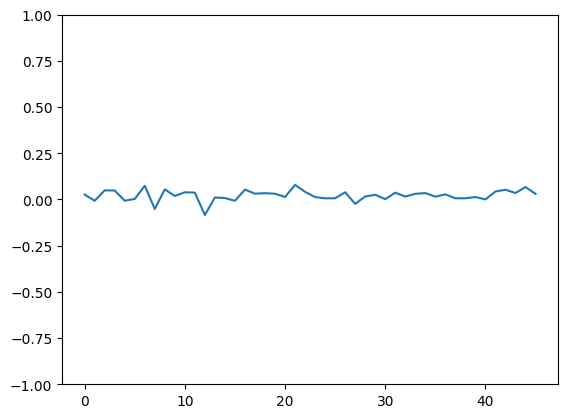

In [13]:
# check whether data is standardized or not
# mean should be 1

plt.ylim(-1,1)

means = []
for i in range(X.shape[1]):
    means.append(np.mean(Xtest[:,i]))
plt.plot(means , scaley=False)

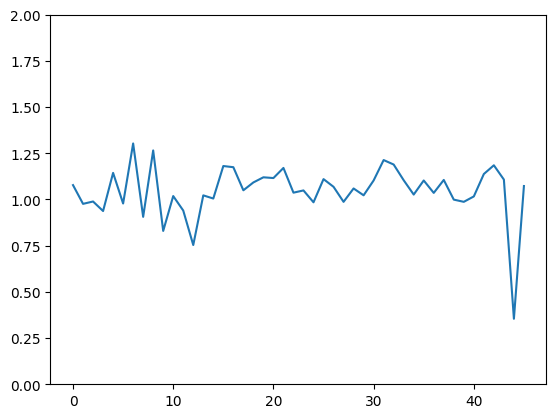

In [14]:
# Check variances

plt.ylim(0,2)

vars = []
for i in range(X.shape[1]):
    vars.append(np.var(Xtest[:,i]))
plt.plot(vars)

In [15]:
from sklearn.linear_model import Ridge , Lasso , ElasticNet , LinearRegression

In [16]:
model_linear = LinearRegression()
model_linear.fit(Xtrain , Ytrain)
print(" Training Accuracy : " , model_linear.score(Xtrain , Ytrain))
print(" Testing Accuracy : " , model_linear.score(Xtest , Ytest))

 Training Accuracy :  0.878378556657698
 Testing Accuracy :  0.8899098324462105


Text(0, 0.5, 'Importance')

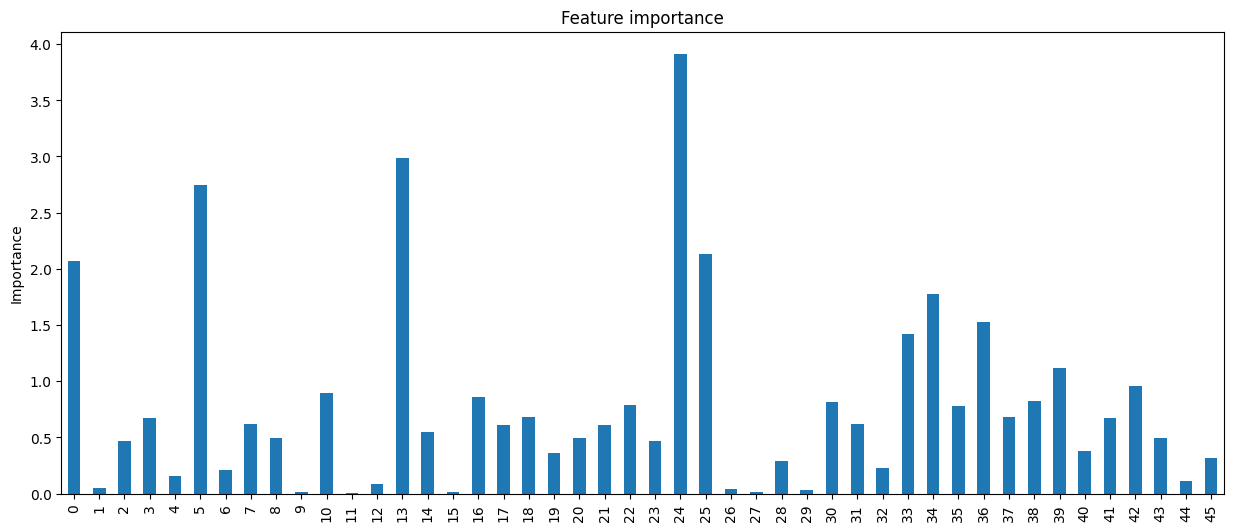

In [17]:
# Let's now plot the feature's importance
# according to the linear model.

# Create series with feature importance.
tmp = pd.Series(np.abs(model_linear.coef_))

# Let's add the variable names.
Xtrain = pd.DataFrame(Xtrain)
tmp.index = Xtrain.columns

# Let's make a bar plot.
tmp.plot.bar(figsize=(15, 6))
plt.title("Feature importance")
plt.ylabel("Importance")

In [18]:
def rmse_score(y_test , y_pred):
    value = (1/len(y_test))*np.sum((y_test - y_pred)**2)
    return np.sqrt(value)

def r2_score(y_test , y_pred):
    numenator = (1/len(y_test))*np.sum((y_test - y_pred)**2)
    denominator = (1/len(y_test))*np.sum((y_test - np.mean(y_test))**2)
    return (1 - (numenator/denominator))

def mae(y_test , y_pred):
    return (1/len(y_test))*np.sum(np.abs(y_test - y_pred))

def adj_r2_score(y_test , y_pred , n_features):
    numenator = (1-r2_score(y_test , y_pred))*(len(y_test) - 1)
    denominator = len(y_test) - n_features - 1
    return 1 - (numenator/denominator)

In [19]:
model = LinearRegression()
model.fit(Xtrain , Ytrain)

Ypred = model.predict(Xtest)

print("rmse_score : " , rmse_score(Ytest , Ypred))
print("r2_score : " , r2_score(Ytest , Ypred))
print("mae : " , mae(Ytest , Ypred))
print("adj_r2_score : " , adj_r2_score(Ytest , Ypred , Xtest.shape[1]))

rmse_score :  1.3044647186988076
r2_score :  0.8899098324462105
mae :  1.0183454752242993
adj_r2_score :  0.8798218888058233


In [20]:
model.coef_

array([ 2.06940075e+00,  4.68153906e-02, -4.63576250e-01, -6.71825240e-01,
       -1.53482152e-01, -2.74974207e+00, -2.07900929e-01, -6.15666899e-01,
        4.95203330e-01,  1.25872356e-02,  8.94888820e-01,  3.36449301e-03,
        8.58407450e-02,  2.98270407e+00,  5.48833771e-01, -1.53239832e-02,
        8.55892262e-01,  6.07647027e-01,  6.80372327e-01, -3.59170659e-01,
        4.94952597e-01, -6.06608911e-01, -7.87604996e-01, -4.64036691e-01,
       -3.91528514e+00, -2.13019516e+00, -4.12458322e-02, -1.58302902e-02,
        2.85119241e-01,  2.80444817e-02,  8.15450588e-01, -6.14812177e-01,
        2.22891003e-01,  1.41974214e+00, -1.77602903e+00,  7.75766642e-01,
        1.52852773e+00, -6.77950100e-01, -8.27620119e-01,  1.11678837e+00,
        3.80948258e-01, -6.69813245e-01,  9.52568479e-01, -4.93829707e-01,
        1.14057674e-01, -3.18039902e-01])

In [21]:
save_object(model , "MyModel")

In [22]:
def load_object(name):
    pickle_obj = open(f"{name}.pck","rb")
    obj = pickle.load(pickle_obj)
    return obj

Apply k-Fold Cross Validataion

In [23]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = model, X= Xtrain, y = Ytrain, cv = 10)
accuracies.mean()



0.8689379354152077

In [24]:
accuracies.std()

0.020760790818934134

In [ ]:
save_object(model , "MyModel")

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [26]:
def load_object(name):
    pickle_obj = open(f"{name}.pck","rb")
    obj = pickle.load(pickle_obj)
    return obj

In [45]:
# Load the Data Point

data1 = pd.read_csv("2023_one hours_1 _On_state.csv")

idx = 1
to_be_predicted = data1.iloc[idx,:].values

col_names = data1.columns
predict_dict = {}

for col_name , val in zip(col_names , to_be_predicted):
    predict_dict[col_name] = val

print(predict_dict)

{'Date_Time': '01/20/2023 17:00:00', 'Gt Exhaust Outlet Temp': 611.855, 'Turbine Speed In RPM': 2999.121, 'GT Fuel Gas Mass Flow': 13.76, 'GT Gross MW': 231.782, 'GT Compres Inlet Temp': 18.94, 'GT IGV Position': 87.999, 'GT Turbine Inlet Temperature': 1255.732, 'GT Swirl Angle': 14.534, 'GT Efficiency Actual (LHV)': 34.919, 'GT (Expander) Efficiency': 85.409, 'Combust Monitor Actual Spread 2': 31.11, 'GT Compres Inlet Press': 101.144, 'Combust Monitor Actual Spread 1': 32.684, 'GT Exhaust Outlet Temp Exp': 593.359, 'GT Exhaust Gas Flow - HB': 650.398, 'Combust Monitor Actual Spread 3': 28.545, 'Turb Exhaust T/C 1': 605.521, 'Turb Exhaust T/C 2': 616.841, 'Turb Exhaust T/C 3': 613.112, 'Turb Exhaust T/C 4': 608.078, 'Turb Exhaust T/C 5': 610.889, 'Turb Exhaust T/C 6': 617.786, 'Turb Exhaust T/C 7': 615.462, 'Turb Exhaust T/C 8': 590.769, 'Turb Exhaust T/C 9': 592.022, 'Turb Exhaust T/C 10': 595.413, 'Turb Exhaust T/C 11': 601.77, 'Turb Exhaust T/C 12': 618.97, 'Turb Exhaust T/C 13': 61

In [46]:
real_value = predict_dict["Combust Monitor Actual Spread 1"]
del predict_dict["Combust Monitor Actual Spread 1"]

In [47]:
predict_dict

{'Date_Time': '01/20/2023 17:00:00',
 'Gt Exhaust Outlet Temp': 611.855,
 'Turbine Speed In RPM': 2999.121,
 'GT Fuel Gas Mass Flow': 13.76,
 'GT Gross MW': 231.782,
 'GT Compres Inlet Temp': 18.94,
 'GT IGV Position': 87.999,
 'GT Turbine Inlet Temperature': 1255.732,
 'GT Swirl Angle': 14.534,
 'GT Efficiency Actual (LHV)': 34.919,
 'GT (Expander) Efficiency': 85.409,
 'Combust Monitor Actual Spread 2': 31.11,
 'GT Compres Inlet Press': 101.144,
 'GT Exhaust Outlet Temp Exp': 593.359,
 'GT Exhaust Gas Flow - HB': 650.398,
 'Combust Monitor Actual Spread 3': 28.545,
 'Turb Exhaust T/C 1': 605.521,
 'Turb Exhaust T/C 2': 616.841,
 'Turb Exhaust T/C 3': 613.112,
 'Turb Exhaust T/C 4': 608.078,
 'Turb Exhaust T/C 5': 610.889,
 'Turb Exhaust T/C 6': 617.786,
 'Turb Exhaust T/C 7': 615.462,
 'Turb Exhaust T/C 8': 590.769,
 'Turb Exhaust T/C 9': 592.022,
 'Turb Exhaust T/C 10': 595.413,
 'Turb Exhaust T/C 11': 601.77,
 'Turb Exhaust T/C 12': 618.97,
 'Turb Exhaust T/C 13': 613.557,
 'Turb E

In [48]:
# Lets make the main array

col_sequence = load_object("columns")
array = []

for col_name in col_sequence :
    array.append(predict_dict[col_name])

array = np.array(array)

print(array)

[ 611.855 2999.121   13.76   231.782   18.94    87.999 1255.732   14.534
   34.919   85.409   31.11   101.144  593.359  650.398   28.545  605.521
  616.841  613.112  608.078  610.889  617.786  615.462  590.769  592.022
  595.413  601.77   618.97   613.557  601.719  622.995  616.754  622.405
  616.047  614.959  623.586  616.618  615.768  608.536  605.209  601.492
  610.876  615.695  628.713  611.376  604.494  619.819]


In [49]:
array = load_object("Scaler").transform(array.reshape(1,-1))

In [50]:
array

array([[-2.27123054, -0.55860933,  1.21674157,  1.48648159, -2.18324016,
         0.76994402,  0.07905515, -1.53942946,  0.53824941,  0.11043274,
         1.35352479,  1.28609396, -1.41804834,  1.25318254,  1.63290637,
        -3.36952936, -3.06966386, -1.77283073, -3.0583581 , -2.72750062,
        -2.62748446, -2.20483121, -2.97560229, -2.28152224, -1.28606428,
        -2.75001159, -1.31963301, -1.95435095, -2.2050493 , -0.41114041,
        -2.31245883, -1.8435583 , -2.67952572, -2.26096023, -0.8969399 ,
        -2.31075333, -1.55992521, -3.17940847, -1.46011902, -1.11302727,
        -1.47448832, -2.21938304, -1.20626541, -2.80545607, -1.37104469,
        -1.29827443]])

In [51]:
prediction = load_object("MyModel").predict(array)
print(prediction)

[32.48842638]


In [52]:
print(" Original " , real_value , " , Predicted " , float(prediction[0] ))
print("rms",(real_value - float(prediction[0]))**2)


 Original  32.684  , Predicted  32.48842637519042
rms 0.03824904272115683


In [53]:
idx = 2

to_be_predicted = data1.iloc[idx,:].values

col_names = data1.columns
predict_dict = {}

for col_name , val in zip(col_names , to_be_predicted):
  predict_dict[col_name] = val

real_value = predict_dict["Combust Monitor Actual Spread 1"]
del predict_dict["Combust Monitor Actual Spread 1"]

col_sequence = load_object("columns")
array = []

for col_name in col_sequence :
  array.append(predict_dict[col_name])

array = np.array(array)

array = load_object("Scaler").transform(array.reshape(1,-1))
prediction = load_object("MyModel").predict(array)
print(" Original " , real_value , " , Predicted " , float(prediction[0]),"rms",(real_value -float(prediction[0]))**2  )

 Original  32.458  , Predicted  31.93539985068482 rms 0.27311091606424603


In [36]:

for idx in range(len(data1)):

  to_be_predicted = data1.iloc[idx,:].values

  col_names = data1.columns
  predict_dict = {}

  for col_name , val in zip(col_names , to_be_predicted):
    predict_dict[col_name] = val

  real_value = predict_dict["Combust Monitor Actual Spread 1"]
  del predict_dict["Combust Monitor Actual Spread 1"]

  col_sequence = load_object("columns")
  array = []

  for col_name in col_sequence :
    array.append(predict_dict[col_name])

  array = np.array(array)

  array = load_object("Scaler").transform(array.reshape(1,-1))
  prediction = load_object("MyModel").predict(array)
  print("Date_Time",predict_dict["Date_Time"]," Original " , real_value , " , Predicted " , float(prediction[0]),"rmse",abs(((real_value -float(prediction[0])))) )


串流輸出內容已截斷至最後 5000 行。
Date_Time 04/04/2023 17:00:00  Original  19.839  , Predicted  -119.67501997220934 rmse 139.51401997220933
Date_Time 04/04/2023 18:00:00  Original  15.964  , Predicted  -120.23578948310343 rmse 136.19978948310344
Date_Time 04/04/2023 19:00:00  Original  14.794  , Predicted  -120.21709473920775 rmse 135.01109473920775
Date_Time 04/04/2023 20:00:00  Original  13.508  , Predicted  -119.62516053579274 rmse 133.13316053579274
Date_Time 04/04/2023 21:00:00  Original  13.367  , Predicted  -118.9977353260344 rmse 132.3647353260344
Date_Time 04/04/2023 22:00:00  Original  12.364  , Predicted  -119.03363675362318 rmse 131.39763675362317
Date_Time 04/04/2023 23:00:00  Original  11.462  , Predicted  -118.83319060614984 rmse 130.29519060614984
Date_Time 04/05/2023 00:00:00  Original  10.811  , Predicted  -118.8625075792204 rmse 129.6735075792204
Date_Time 04/05/2023 01:00:00  Original  10.5  , Predicted  -118.3240180625642 rmse 128.82401806256422
Date_Time 04/05/2023 02:00:00  O

In [54]:
store_values = []

for idx in range(len(data1)):

  to_be_predicted = data1.iloc[idx,:].values

  col_names = data1.columns
  predict_dict = {}



  for col_name , val in zip(col_names , to_be_predicted):
    predict_dict[col_name] = val

  real_value = predict_dict["Combust Monitor Actual Spread 1"]
  del predict_dict["Combust Monitor Actual Spread 1"]

  col_sequence = load_object("columns")
  array = []

  for col_name in col_sequence :
    array.append(predict_dict[col_name])

  array = np.array(array)

  array = load_object("Scaler").transform(array.reshape(1,-1))
  prediction = load_object("MyModel").predict(array)
  print("Date_Time",predict_dict["Date_Time"]," Original " , real_value , " , Predicted " , float(prediction[0]),"rmse",abs(((real_value -float(prediction[0])))) )
  store_values.append(predict_dict["Date_Time"])
  store_values.append(real_value)
  store_values.append(float(prediction[0]))
  store_values.append(abs(((real_value -float(prediction[0])))))






Date_Time 01/20/2023 16:00:00  Original  24.463  , Predicted  18.444916489007866 rmse 6.018083510992135
Date_Time 01/20/2023 17:00:00  Original  32.684  , Predicted  32.48842637519042 rmse 0.19557362480957607
Date_Time 01/20/2023 18:00:00  Original  32.458  , Predicted  31.93539985068482 rmse 0.5226001493151777
Date_Time 01/20/2023 19:00:00  Original  34.742  , Predicted  33.33601166681361 rmse 1.4059883331863858
Date_Time 01/20/2023 20:00:00  Original  35.122  , Predicted  32.87213558005581 rmse 2.2498644199441884
Date_Time 01/20/2023 21:00:00  Original  19.609  , Predicted  19.893270633701448 rmse 0.28427063370144623
Date_Time 01/20/2023 22:00:00  Original  31.966  , Predicted  32.57081267247192 rmse 0.6048126724719154
Date_Time 01/20/2023 23:00:00  Original  32.783  , Predicted  32.2222452410271 rmse 0.5607547589728981
Date_Time 01/21/2023 00:00:00  Original  30.426  , Predicted  31.370107062204397 rmse 0.9441070622043988
Date_Time 01/26/2023 09:00:00  Original  35.372  , Predicted 

In [55]:
my_array = np.array(store_values)
my_array

array(['01/20/2023 16:00:00', '24.463', '18.444916489007866', ...,
       '31.167', '32.31866091421082', '1.1516609142108152'], dtype='<U32')

In [56]:
import csv

with open('Error_checking.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    field = ["Date_Time", "Real", "Predicted", "rmse"]

    writer.writerow(field)
    writer.writerow(my_array.reshape(len(data1),4))

In [57]:
!pip install prophet

In [62]:
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

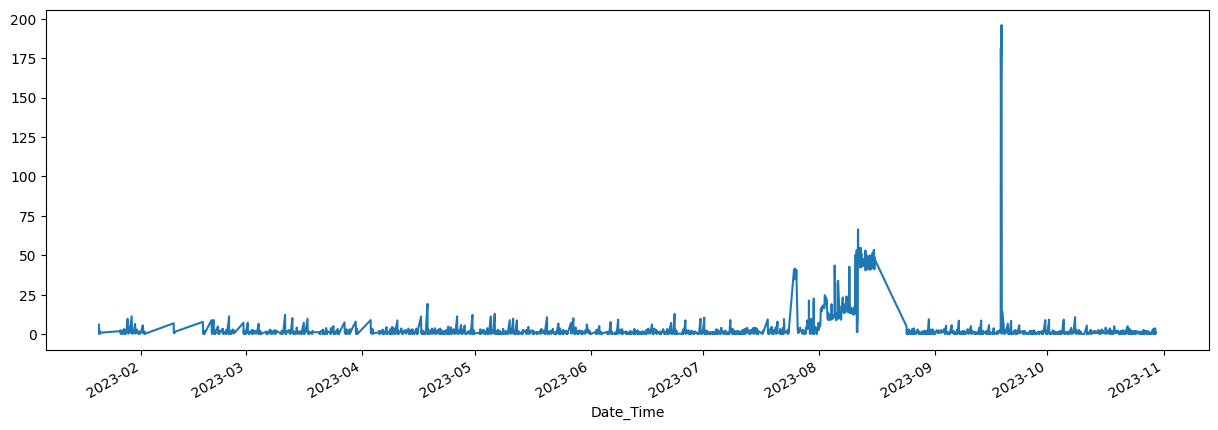

In [64]:
df = pd.read_csv('Trend of Error.csv', index_col='Date_Time', parse_dates=True)
df["rmse"].plot(figsize=(15, 5));

In [65]:
df_p = df[df['Real']>0][['rmse']].copy()
df_p['Date_Time'] = df_p.index

In [66]:
df_p.head()

,rmse,Date_Time
Date_Time,,
2023-01-20 16:00:00,6.018084,2023-01-20 16:00:00
2023-01-20 17:00:00,0.195574,2023-01-20 17:00:00
2023-01-20 18:00:00,0.522600,2023-01-20 18:00:00
2023-01-20 19:00:00,1.405988,2023-01-20 19:00:00
2023-01-20 20:00:00,2.249864,2023-01-20 20:00:00


In [67]:
df_p.columns = ['y', 'ds']
df_p.head()

,y,ds
Date_Time,,
2023-01-20 16:00:00,6.018084,2023-01-20 16:00:00
2023-01-20 17:00:00,0.195574,2023-01-20 17:00:00
2023-01-20 18:00:00,0.522600,2023-01-20 18:00:00
2023-01-20 19:00:00,1.405988,2023-01-20 19:00:00
2023-01-20 20:00:00,2.249864,2023-01-20 20:00:00


In [68]:
logdf = df_p.copy()
logdf['y'] = np.log(logdf['y'])
logdf.head()

,y,ds
Date_Time,,
2023-01-20 16:00:00,1.794769,2023-01-20 16:00:00
2023-01-20 17:00:00,-1.631818,2023-01-20 17:00:00
2023-01-20 18:00:00,-0.648939,2023-01-20 18:00:00
2023-01-20 19:00:00,0.340740,2023-01-20 19:00:00
2023-01-20 20:00:00,0.810870,2023-01-20 20:00:00


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxl40jycl/n97lxhg5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxl40jycl/5eo4zhjq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39774', 'data', 'file=/tmp/tmpxl40jycl/n97lxhg5.json', 'init=/tmp/tmpxl40jycl/5eo4zhjq.json', 'output', 'file=/tmp/tmpxl40jycl/prophet_model5ah87cms/prophet_model-20231120141226.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:12:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:12:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


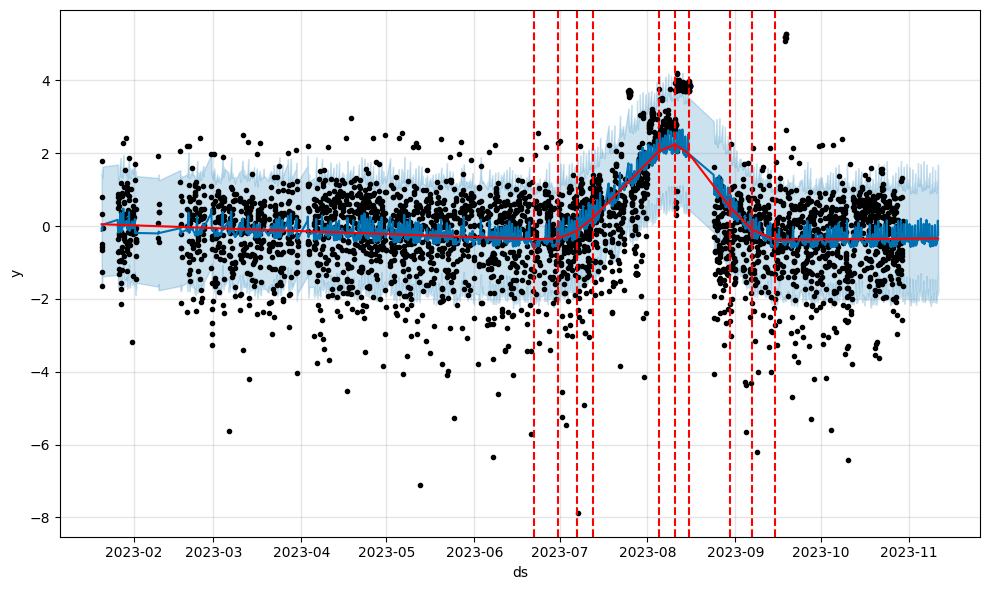

In [69]:
m3 = Prophet()
m3.fit(logdf)
future = m3.make_future_dataframe(periods=300, freq = 'H')
forecast = m3.predict(future)
fig = m3.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), m3, forecast)

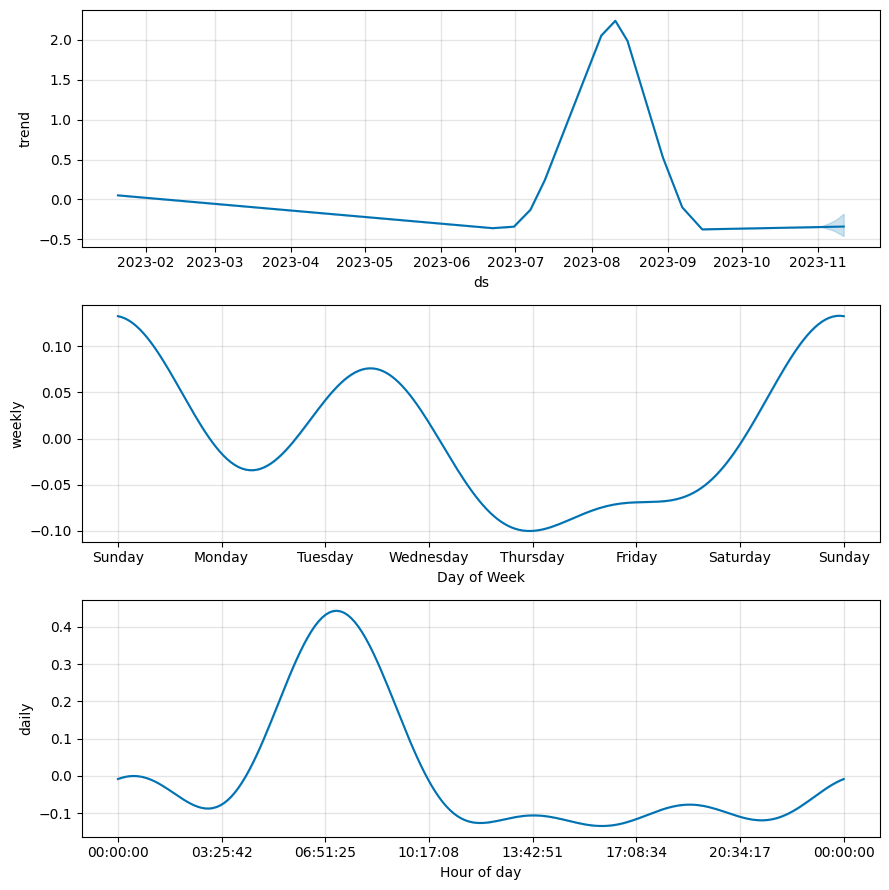

In [70]:
m3.plot_components(forecast);